# BETAING THE BOOKIE - IS IT EVEN POSSIBLE?

------------------------

Agenda:
- How do bookmakers work?
- How are bookmakers' odds calculated?
- What are some of the money management strategies?
- How can you implement a machine learning model to that problem?
- Modelling & fun with data

## 1. How do bookmakers work?

![MoneyUrl](https://media.tenor.com/-1phYTnql_kAAAAd/xrd-exrd.gif "money")<br>
Gif of an average bookmaker

### Definition

<font size="1">(I mean, yeah, there is porbably a better one but who would like to read dull wikipedia pages, right?)</font>

Typically bookmaker is a proffesion like no other.<br>
They posses magical skills of multiplying your money when you are right! 
 
Imagine if you had one dollar for every right thing you said...
    Sounds great?? I guess so.
    
But there is a catch. Not like a small one but rather a <b> BIG </b> one. It is gambling after all...
Once you are wrong, you lose all that you staked.

"Okay okay mr. Know it All but if you lose money and probably the odds are rigged in favour of bookmakers then you are destined to lose, don't you?" <br>
"Well yes, but no." - I would respond <br>
"Go on.." <br>
"Hold your horses Speedy Gonzalez, let's take a minute to learn the ropes, then we could have some fun with it"

<font size="1">I guess that's how an average conversation with some of you would go. No? Ok, I was just guessing..</font>

### What is their job?

Their task is to create odds for specific results (e.g. draw, home team win, which horse is the fastest, etc.) in specific sporting events. <br>
A bookmaker's job may look simple but in reality it isn't. One small slip in odds offer and they may lose lots of money.

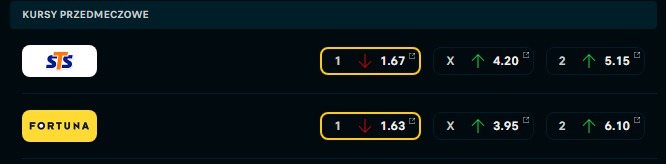 <br> Example odds for a football game, 1 is home win, x is draw and 2 means away win
<br> From that you can calculate probabilities

DISCLAIMER 1: This presentation is neither an investment proposal nor an encouragement for gambling, it is merely a fun notebook to see if you can really beat the bookmaker <br>
DISCLAIMER 2: I'm sorry whole world and UK but in this presentation we will be working with european odds because they simply MAKE THE MOST SENSE

Okay, with that sorted let's move on to the next section

## 2. How are bookmakers' odds calculated?

First of all, let's see what's all this fuss about european odds. In short, it is easy to see what the expected payout would be. For example if you were to bet \\$10 on an event that has 1.5 odds, then you may win \\$15. Or lose it all in case you pick the wrong option. Furthermore european odds are also easily transformed into implied probability:

$$
\pi_{i} = 1/o_{i}
$$

Hold up, <b><i>implied</i></b> probability?

Yep, that is right, had we been living in a perfect world, then all of the implied probabilities of all possible outcomes of a match would sum up to 1. But sadly, it is very rare.

In the majority of cases this addition ends up in values bigger than 1. Bookmakers do that deliberately, because they want to earn some money. Think of it as a margin for bookmaker.

One way to calculate the real probabilities is to divide each implied probability by the sum of all implied probabilities:

$$
p_{i} = \frac{1}{\sum_{i=1}^{n}\pi_{i}}
$$

### How do they know what odds to offer?

Basically, the starting odds are calculated with help of statistical models but then it is getting more complex. Odds fluctuate throught the time period from initial offering to the start of the match. Why? Imagine if all players for some weird reason would bet on one event that eventually occured in reality. In this way bookmaker would be furious, they would lose lots of money. Therefore they adjust their odds to incentivize betting on different events. That is called risk management.

Can you see where this is going? It smells to me like market inefficiency...

![InefficiencyUrl](https://media1.giphy.com/media/3o6MbiByum8PSsQcMg/giphy.gif?cid=ecf05e47wfr2s9r0tkvlaaez15sbqen2j38s6azn9u0gjtmr&ep=v1_gifs_search&rid=giphy.gif&ct=g "inefficiency")

And it is exactly what interests professional betting freaks. Analysis of hundreds of offered odds from different bookmakers, seeking arbitrage opportunities, all of this is possible! Yet, in this presentation we won't go that far. Nonetheless, here are some research papers from betting geeks if you want to delve deeper into that topic:

- 
- 

## 3. What are some of the money management strategies?

Some of the most notable ones include:
- betting only on odds bigger than 1.5 with high probability of conversion
- usage of Kelly Criterion
- usage of Markowitz Portfolio Management

First one is pretty straightforward. Look for discreptancies between real and implied odds, then bet money on those juicy odds

Second one is more tricky:

$$
K=(B⋅P-(1-P))∕B
$$

where B is offered odds minus 1, P is probability of an event occuring (calculated by the player). This way you will obtain K which is the percentage of funds that could be invested in betting on given event.

The third one is the trickiest of all, so I will leave a link for those of you who are interested: <br>
https://en.wikipedia.org/wiki/Modern_portfolio_theory

In essence, it provides a systematic approach to investment decision-making by quantifying risk and return, emphasizing diversification, and guiding investors in building portfolios that align with their risk preferences and financial goals

<font size=1> Thanks Chat GPT :)</font>

Ok cool, now I know some money management strategies, next time I won't buy an overpriced coffee from Starbucks, but how do I calculate my own probabilities or something? - you may ask <br>
Answer is simple, just implement those funny little things:

## 4. How can you implement a machine learning model to that problem?

How? Easily!

![WinUrl](https://media.tenor.com/FLzvTbTtvJEAAAAC/jens-gustafsson-jens.gif "win")

There are multitude of models out there but let's focus on a model that is easy to use, easy to explain and generates good results - XGBoost!

### What is XGBoost?

Well, to keep it short, it is a type of ensemble learning methods which are methods combining creation of multpile models to boost model's performance and learn on mistakes. <br>
XGBoost's main ideas are:
- <b>Gradient Boosting</b>: XGBoost is based on gradient boosting, which is a sequential ensemble learning method. It builds an ensemble of decision trees one at a time, with each tree correcting the errors made by the previous ones. This iterative process continues until a specified number of trees are created or until a performance criterion is met.

- <b>Regularization</b>: XGBoost incorporates L1 (Lasso) and L2 (Ridge) regularization techniques to prevent overfitting. These regularization terms are added to the objective function during training, penalizing complex models and encouraging simplicity.

Here you can find great video on that topic: <br>
https://www.youtube.com/watch?v=OtD8wVaFm6E&ab_channel=StatQuestwithJoshStarmer

By training, adjusting and applying this algorithm to the data, we may be able to create a model that will be able to accurately predict outcomes of matches.

## 5. Modelling & fun with data

#### Import essential libraries

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from typing import NamedTuple
from xgboost import XGBRegressor

#### Load data

In [27]:
class ColumnsConfig(NamedTuple):
    round_col: str = 'Round'
    home_team_col: str = 'Home'
    away_team_col: str = 'Away'
    goal_difference_col: str = 'goal_diff'
    no_match_home: str = 'no_match_home'
    no_match_away: str = 'no_match_away'
    scaled_goal_diff_col: str = 'goal_diff_scaled'
    bet_h: str = 'H_BET'
    bet_draw: str = 'X_BET'
    bet_a: str = 'A_BET'
        
        
teams_dict = {'Bruk-Bet T.': 1,
 'Lech Poznań': 2,
 'Górnik Łęczna': 3,
 'Jagiellonia Białystok': 4,
 'Legia Warszawa': 5,
 'Piast Gliwice': 6,
 'Śląsk Wrocław': 7,
 'Pogoń Szczecin': 8,
 'Wisła Kraków': 9,
 'Górnik Zabrze': 10,
 'Zagłębie Lubin': 11,
 'Stal Mielec': 12,
 'Radomiak Radom': 13,
 'Warta Poznań': 14,
 'Cracovia': 15,
 'Lechia Gdańsk': 16,
 'Wisła Płock': 17,
 'Raków Częstochowa': 18}

In [24]:
df = pd.read_csv('data/data_football.csv', sep=';')
df.shape

(306, 65)

In [38]:
config = ColumnsConfig()

That's great and all but how on earth can we predict final result without knowning all of the statistics which are happening during the match in the first place?

That's where average values come in clutch!

In [60]:
df.head()

,Unnamed: 0,Unnamed: 0.1,League,Home,Away,INC,Round,Date,Time,H_Score,...,Fouls_avg_A,Yellow_Cards_avg_H,Yellow_Cards_avg_A,Ball_Possession_avg_H,Ball_Possession_avg_A,Corner_Kicks_avg_H,Corner_Kicks_avg_A,Offsides_avg_H,Offsides_avg_A,goal_diff_scaled
0,62798,62798,pko-bp-ekstraklasa,1,12,"[""30' Yellow_Home - Mesanovic M."", ""42' Goal_H...",1,2021-07-23,18:00,1.0,...,16.0,2.0,2.0,0.52,0.48,1.0,2.0,3.0,0.0,0.0
1,62797,62797,pko-bp-ekstraklasa,2,13,"[""12' Yellow_Away - Machado L."", ""60' Yellow_H...",1,2021-07-23,20:30,0.0,...,9.0,1.0,1.0,0.55,0.45,9.0,5.0,6.0,2.0,0.0
2,62796,62796,pko-bp-ekstraklasa,3,15,"[""13' Yellow_Away - Kakabadze O."", ""24' Yellow...",1,2021-07-24,15:00,1.0,...,10.0,3.0,3.0,0.48,0.52,7.0,7.0,0.0,1.0,0.0
3,62795,62795,pko-bp-ekstraklasa,4,16,"[""49' Yellow_Home - Cernych F."", ""52' Goal_Awa...",1,2021-07-24,17:30,1.0,...,11.0,2.0,1.0,0.52,0.48,5.0,9.0,1.0,1.0,0.0
4,62794,62794,pko-bp-ekstraklasa,5,17,"[""28' Goal_Home - Muci E.(Nawrocki M.)"", ""29' ...",1,2021-07-24,20:00,1.0,...,20.0,2.0,2.0,0.55,0.45,0.0,6.0,2.0,3.0,0.5


I created those earlier, so you don't have to worry :)

But still there is something missing... and that is:

#### Data preprocessing & modelling

In [45]:
def scale_data(df: pd.DataFrame, col: str) -> (pd.DataFrame, RobustScaler):
    scaler = RobustScaler()
    df[config.scaled_goal_diff_col] = scaler.fit_transform(df[config.goal_difference_col].values.reshape(-1,1))
    return df, scaler


def create_train_test_sets(df: pd.DataFrame, rounds: int) -> tuple():
    config = ColumnsConfig()
    df, scaler = scale_data(df, config.goal_difference_col)
    df = pd.get_dummies(df, columns=[config.home_team_col, config.away_team_col])
    df = df.replace(True, 1)
    df = df.replace(False, 0)
    for col in df.columns:
        if col.startswith(f"{config.away_team_col}_"):
            corresponding_col = col.replace(f"{config.away_team_col}_", f"{config.home_team_col}_")
            df[corresponding_col] = df.apply(lambda x: -1 if x[col] == 1 else x[corresponding_col], axis=1)
    cols_to_drop = [column for column in df.columns if column.startswith(f"{config.away_team_col}_")]
    df = df.drop(columns=[*cols_to_drop])
    x_train = df[df[config.round_col] < int(rounds)]
    x_test = df[df[config.round_col] == int(rounds)]
    y_train = x_train[config.scaled_goal_diff_col]
    y_test = x_test[config.scaled_goal_diff_col]
    return x_train, x_test, y_train, y_test, scaler


def create_dataset(X, y) -> (np.array, np.array):
    Xs, ys = [], []
    for i in range(len(X)):
        v = X.iloc[i].values
        Xs.append(v)
        ys.append(y.iloc[i])     
    return np.array(Xs), np.array(ys)


def inverse_transform(y_pred: np.array, y_test: np.array, scaler: RobustScaler) -> (np.array, np.array):
    y_pred = scaler.inverse_transform(y_pred.reshape(1, -1)).reshape(-1, 1)
    y_test = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
    y_test = np.concatenate(y_test).flatten()
    y_pred = np.concatenate(y_pred).flatten()
    return y_pred, y_test


def place_bets(y_pred: np.array, y_test: np.array, x_test: pd.DataFrame, translator_dict: dict, invested_amount_per_bet: float = 10.0) -> (list, list, list, list):
    cols_to_use = [col for col in x_test.columns if col.startswith(f"{config.home_team_col}_")]
    x_test[config.home_team_col] = x_test[x_test[cols_to_use].eq(1)].apply(lambda x: int(x.idxmax().split('_')[-1]) if x.any() else 0, axis=1)
    x_test[config.away_team_col] = x_test[x_test[cols_to_use].eq(-1)].apply(lambda x: int(x.idxmax().split('_')[-1]) if x.any() else 0, axis=1)
    bets_won, invested_money, correct_results, matches_with_preds, real_results = [], [], [], [], []
    for match in range(len(y_pred)):
        analyzed_match = y_pred[match]
        if abs(analyzed_match) >= 1.1:
            home_team = x_test.iloc[match][config.home_team_col]
            home_team = next((key for key, value in translator_dict.items() if value == home_team), None)
            away_team = x_test.iloc[match][config.away_team_col]
            away_team = next((key for key, value in translator_dict.items() if value == away_team), None)
            matches_with_preds.append({f"{home_team} vs {away_team}": f"{y_pred[match]}"})
            real_results.append({f"{home_team} vs {away_team}": f"{y_test[match]}"})
            invested_money.append(invested_amount_per_bet)
            if analyzed_match > 0 and y_test[match] > 0:
                bets_won.append(invested_amount_per_bet*x_test.iloc[match][config.bet_h])
                correct_results.append(1)
            elif analyzed_match < 0 and y_test[match] < 0:
                bets_won.append(invested_amount_per_bet*x_test.iloc[match][config.bet_a])
                correct_results.append(1)
            else:
                bets_won.append(0)
                correct_results.append(0)
    if len(invested_money) == 0:
        bets_won.append(0)
        invested_money.append(0)
    return bets_won, invested_money, correct_results, matches_with_preds, real_results

#### And now, let's put ALL TOGETHER!

In [52]:
def generate_predictions(df: pd.DataFrame, starting_matchday: int, teams_dict: dict) -> (list, list, list, list, list):
    config = ColumnsConfig()
    bets_won, invested_money, correct_results, matches_with_preds, real_results, studies = [], [], [], [], [], []
    for matchday in range(starting_matchday, 35):
        x_train, x_test, y_train, y_test, scaler = create_train_test_sets(df, matchday)
        cols = ['h_form', 'a_form', 'Shots_on_Goal_avg_H', 'Shots_on_Goal_avg_A', 'Fouls_avg_H', 'Fouls_avg_A', 'Corner_Kicks_avg_H', 'Corner_Kicks_avg_A', 'Offsides_avg_H', 'Offsides_avg_A']
        cols_embedded = [config.home_team_col, config.away_team_col]     
        x_train = x_train.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        x_test = x_test.reset_index(drop=True)
        bets_x_test = x_test[[config.bet_h, config.bet_draw, config.bet_a]].copy()
        y_test = y_test.reset_index(drop=True)
        cols = cols + [col for col in x_train if col.startswith(f"{config.home_team_col}_")]
        x, y = create_dataset(x_train[cols], y_train)
        x_testing, y_testing = create_dataset(x_test[cols], y_test)
        x_train = x_train[cols]
        x_test = x_test[cols]
        model = XGBRegressor()
        model.fit(x, y, eval_set=[(x_testing, y_testing)], early_stopping_rounds=10, verbose=False)
        y_pred = model.predict(x_testing)
        y_pred, y_test = inverse_transform(y_pred, y_test, scaler)
        x_test = x_test.merge(bets_x_test, how='left', left_index=True, right_index=True)
        won, invested, correct, preds, results = place_bets(y_pred, y_test, x_test, teams_dict)
        bets_won.append(won)
        invested_money.append(invested)
        correct_results.append(correct)
        matches_with_preds.append(preds)
        real_results.append(results)
        print(f"ROUND: {matchday}")
        print(f"MONEY INVESTED: {sum(invested)}")
        print(f"MONEY WON: {sum(won)}")
        print(f"MATCH RESULTS: {correct}")
    return bets_won, invested_money, correct_results, matches_with_preds, real_results, model, studies

#### Ready, steady... go!

In [53]:
won, invested, correct, preds, real_res, model, s = generate_predictions(df, 9, teams_dict)

ROUND: 9
MONEY INVESTED: 30.0
MONEY WON: 47.900000000000006
MATCH RESULTS: [1, 1, 0]
ROUND: 10
MONEY INVESTED: 50.0
MONEY WON: 67.6
MATCH RESULTS: [0, 1, 1, 1, 1]
ROUND: 11
MONEY INVESTED: 20.0
MONEY WON: 50.5
MATCH RESULTS: [1, 1]
ROUND: 12
MONEY INVESTED: 70.0
MONEY WON: 81.6
MATCH RESULTS: [1, 1, 1, 0, 1, 0, 0]
ROUND: 13
MONEY INVESTED: 0
MONEY WON: 0
MATCH RESULTS: []
ROUND: 14
MONEY INVESTED: 20.0
MONEY WON: 102.2
MATCH RESULTS: [1, 1]
ROUND: 15
MONEY INVESTED: 40.0
MONEY WON: 88.10000000000001
MATCH RESULTS: [1, 1, 1, 1]
ROUND: 16
MONEY INVESTED: 40.0
MONEY WON: 72.60000000000001
MATCH RESULTS: [1, 1, 1, 1]
ROUND: 17
MONEY INVESTED: 40.0
MONEY WON: 68.4
MATCH RESULTS: [1, 1, 1, 0]
ROUND: 18
MONEY INVESTED: 10.0
MONEY WON: 0
MATCH RESULTS: [0]
ROUND: 19
MONEY INVESTED: 30.0
MONEY WON: 32.7
MATCH RESULTS: [0, 1, 1]
ROUND: 20
MONEY INVESTED: 30.0
MONEY WON: 39.300000000000004
MATCH RESULTS: [1, 1, 0]
ROUND: 21
MONEY INVESTED: 30.0
MONEY WON: 28.3
MATCH RESULTS: [0, 1, 1]
ROUND: 22
M

#### Let's see the final result:

In [55]:
def sum_lists(a_list: list) -> float:
    total_sum = 0
    for sublist in a_list:
        for item in sublist:
            total_sum += item
    return total_sum

In [58]:
sum_lists(won)*0.88 - sum_lists(invested)

195.86400000000003

# Yay, we've <b>won</b>!

But only in this season... who knows what future holds?